## Project Introduction

github link: https://github.com/CS418/group-project-datum

# Datum project

In this jupyter notebook we will be analyzing datasets from chicago.gov containing information on traffic volume across different locations in Chicago as well as data on potholes that were patched, when they were patched, when the request for the patching was made and where those potholes where. We will analyze this data in the hopes of uncovering a relationship or a correlation with traffic and time as well as location and potholes to attempt to understand the factors that influence traffic in Chicago. In order to achieve this we will be going through multiple means of analysis such as linear regression, time series analysis, clustering and more. 

## Any Changes

As of now there are no changes to the scope or the aim of this project. While going over the project we realized that the data in the traffic csv is not up to date as it only goes as far back as 2007, and the data in the potholes csv goes as far back as 2018, therefore it is not possible to join these data sets to find a time based relationship between potholes and traffic. We are looking for a solution, either through datasets that contain all the correct info, or finding datasets that have time frames that align, or finding a new relationship that doesn't involve time.

## Importing the necessary libraries

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Loading and displaying the data 

In [20]:
trafficDF = pd.read_csv("Average_Daily_Traffic_Counts.csv")
potholesDF = pd.read_csv("Potholes_Patched.csv")
trafficDF

,ID,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location
0,414,5838 West,Lake St,11/14/2006,7100,East Bound: 3600 / West Bound: 3500,41.887904,-87.771064,"(41.887904, -87.771064)"
1,176,320 East,76th St,03/28/2006,8600,East Bound: 3800 / West Bound: 4800,41.756542,-87.617335,"(41.756542, -87.617335)"
2,1367,1730 East,57th Dr,08/24/2006,53500,East Bound: 27800 / West Bound: 25700,41.792663,-87.582231,"(41.792663, -87.582231)"
3,316,125 East,24th St,03/30/2006,700,East Bound: 400 / West Bound: 300,41.849302,-87.622658,"(41.849302, -87.622658)"
4,1294,2924 East,130th St,08/29/2006,4200,East Bound: 2300 / West Bound: 1900,41.659177,-87.552112,"(41.659177, -87.552112)"
...,...,...,...,...,...,...,...,...,...
1274,257,256 East,35th St,03/29/2006,10200,East Bound: 4800 / West Bound: 5400,41.831081,-87.619334,"(41.831081, -87.619334)"
1275,950,2032 North,Pulaski Rd,10/05/2006,21300,North Bound: 10800 / South Bound: 10500,41.918169,-87.726590,"(41.918169, -87.72659)"
1276,118,6020 South,Halsted St,03/21/2006,13200,North Bound: 6900 / South Bound: 6300,41.784530,-87.644905,"(41.78453, -87.644905)"
1277,1091,3454 West,Franklin St,10/19/2006,5000,East Bound: 2200 / West Bound: 2800,41.890003,-87.713444,"(41.890003, -87.713444)"


In [21]:
potholesDF

,ADDRESS,REQUEST DATE,COMPLETION DATE,NUMBER OF POTHOLES FILLED ON BLOCK,LATITUDE,LONGITUDE,LOCATION
0,5505 W WINDSOR AVE,04/24/2019 02:06:04 PM,04/26/2019 02:05:16 PM,5,41.963067,-87.765233,POINT (-87.765233060697 41.963067269624)
1,7915 S WHIPPLE Street,10/12/2018 09:34:38 AM,04/26/2019 11:55:04 AM,9,41.749263,-87.698433,POINT (-87.698432887781 41.74926256766)
2,2200 N WESTERN AVE,02/09/2021 11:44:17 AM,02/15/2021 08:29:38 AM,2,41.921868,-87.687877,POINT (-87.687877357472 41.921868144663)
3,1811 N SAWYER AVE,01/26/2021 05:24:41 PM,02/15/2021 08:24:24 AM,3,41.914144,-87.708301,POINT (-87.708301259581 41.914143803492)
4,1804 N SAWYER AVE,01/26/2021 05:24:02 PM,02/15/2021 08:25:11 AM,2,41.913996,-87.708876,POINT (-87.708875611874 41.913995672093)
...,...,...,...,...,...,...,...
122339,6412 N CENTRAL AVE,10/20/2022 11:06:03 AM,10/28/2022 07:38:48 AM,3,41.997901,-87.763882,POINT (-87.76388174557 41.997901361505)
122340,8600 W BERWYN AVE,10/28/2022 01:37:30 PM,10/28/2022 01:38:32 PM,3,41.975397,-87.841767,POINT (-87.841767305979 41.975396530466)
122341,714 S LA SALLE ST,10/28/2022 08:19:54 AM,10/28/2022 08:20:29 AM,2,41.873122,-87.631764,POINT (-87.63176428673 41.873121784361)
122342,200 N CLINTON ST,10/28/2022 08:23:33 AM,10/28/2022 08:24:04 AM,4,41.885798,-87.641352,POINT (-87.641352241032 41.885797893083)


## Descriptive Analysis

In [22]:
trafficDF.dtypes

ID                                               int64
Traffic Volume Count Location  Address          object
Street                                          object
Date of Count                                   object
Total Passing Vehicle Volume                     int64
Vehicle Volume By Each Direction of Traffic     object
Latitude                                       float64
Longitude                                      float64
Location                                        object
dtype: object

In the above cell we print the data types to get a better idea of the data we are working on in the trafficDF data frame. As we can see, there are 9 columns, 5 of these columns being quantitative. The ID, the Total Passing Vehicle Volume, and Vehicle Volume By Each Direction of Traffic columns are all discrete quantitative data types that are Integers. The Latitude and Longitude columns are continuous quantitative data types that are floating point numbers. The Traffic Volume Count Location Address and Street columns are nominal categorical data types taking what we assume to be Strings. The Date of Count and Location columns are ordinal categorical data types taking what we assume to be Strings.

In [23]:
potholesDF.dtypes

ADDRESS                                object
REQUEST DATE                           object
COMPLETION DATE                        object
NUMBER OF POTHOLES FILLED ON BLOCK      int64
LATITUDE                              float64
LONGITUDE                             float64
LOCATION                               object
dtype: object

In the above cell we display the data types to get a better idea of the data we are working on in the potholesDF data frame. As we can see there are 7 columns. The Number of potholes filled on block column is a discrete quantitative data type that is an integer. The Latitude, Longitude columns are continuous quantitative data types that are floating point numbers. The Request date, Completion date and Location columns are ordinal categorical data types taking what we assume to be Strings. The Address column is a nominal categorical data type taking what we assume to be Strings.

In [24]:
trafficDF.describe()

,ID,Total Passing Vehicle Volume,Latitude,Longitude
count,1279.000000,1279.000000,1279.000000,1279.000000
mean,689.937451,19466.301798,41.849394,-87.670298
std,395.568121,12448.378467,0.083917,0.060891
min,1.000000,700.000000,41.651861,-87.854842
25%,348.500000,11350.000000,41.780249,-87.710013
50%,684.000000,17300.000000,41.871380,-87.662850
75%,1028.500000,24200.000000,41.909196,-87.628631
max,1382.000000,165200.000000,42.017888,-87.529702


In the above cell we get a nice summary of some of the descriptive analysis that pertains to the trafficDF data frame. As we can see there are 4 quantitative data types as mentioned previously, only one of them contains information that we believe will not be entirely useful in our analysis that column being ID. Looking at the Total Passing Vehicle Volume we can see that the average is 19466 cars in traffic across the city across the year of 2006, and we can also see that there is a massive difference between the minimum and maximum; This is interesting and can prove useful in our data analysis as this shows that location and time of the year could be playing a big part in the distribution of traffic in Chicago. In terms of Latitude and Longitude, at this point we are not too sure if we can get any useful information from these columns, but there could potentially be some correlation between them and the volume of traffic.

In [25]:
potholesDF.describe()

,NUMBER OF POTHOLES FILLED ON BLOCK,LATITUDE,LONGITUDE
count,122344.000000,121930.000000,121930.000000
mean,12.395066,41.852434,-87.686521
std,16.454423,0.097569,0.061753
min,1.000000,41.644689,-88.015300
25%,3.000000,41.769418,-87.725601
50%,7.000000,41.861721,-87.685153
75%,15.000000,41.939011,-87.645507
max,467.000000,42.022849,-87.524533


In the above cell we get a nice summary of some of the descriptive analysis that pertains to the potholesDF data frame. As we can see there are 3 quantitative data types as mentioned previously. Looking at the Number of potholes filled on block we can see that the average is 12 potholes filled on a block and there is a big difference between the minimum and maximum. On it's own the data from this data frame does not really seem useful to our analysis of traffic in Chicago, however we can try and find a way to merge both data frames by location or latitude and longitude and maybe find a correlation between the number of potholes filled on a block and the amount of traffic in that location. Considering that the traffic data is not up to date and precedes the potholes data in terms of date by a big margin we can assume that the number of potholes filled on the block in a location would actually give us the number of potholes not filled in that block in that location during the time of the traffic data if not more unfilled potholes and then see if there is a correlation between the number of unfilled potholes and the volume of traffic in an area. 

## Data Cleaning and Formating

In [26]:
trafficDF.isnull().sum()

ID                                             0
Traffic Volume Count Location  Address         0
Street                                         0
Date of Count                                  0
Total Passing Vehicle Volume                   0
Vehicle Volume By Each Direction of Traffic    0
Latitude                                       0
Longitude                                      0
Location                                       0
dtype: int64

In the above cell we are trying to find out if there are any values that are null or missing in any of the columns of the trafficDF data frame. As we can see there are no null or missing values in this data frame so in terms of cleaning up the data to get rid of null or missing values, there is no work to be done.

In [27]:
trafficDF.pop('ID ')
trafficDF.sort_values(by=['Date of Count'])

,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location
1194,2531 West,51st St,01/09/2007,20200,East Bound: 10300 / West Bound: 9900,41.801077,-87.688258,"(41.801077, -87.688258)"
927,299 North,Dearborn St,01/09/2007,16600,North Bound: 16600 / / Oneway North Bound,41.886932,-87.629531,"(41.886932, -87.629531)"
56,645 North,State St,01/09/2007,23100,North Bound: 10500 / South Bound: 12600,41.893306,-87.628117,"(41.893306, -87.628117)"
554,4810 North,Milwaukee Ave,01/09/2007,27600,North Bound: 11600 / South Bound: 16000,41.968150,-87.760968,"(41.96815, -87.760968)"
1200,165 North,Canal St,01/24/2007,10200,North Bound: 10200 / / Oneway North Bound,41.885079,-87.639827,"(41.885079, -87.639827)"
...,...,...,...,...,...,...,...,...
1045,5937 West,Madison St,12/13/2006,13400,East Bound: 5500 / West Bound: 7900,41.880108,-87.773266,"(41.880108, -87.773266)"
1039,5900 South,Lake Shore Dr,12/18/2006,53800,North Bound: 29200 / South Bound: 24600,41.787818,-87.577818,"(41.787818, -87.577818)"
689,7150 South,Cottage Grove Ave,12/19/2006,21400,North Bound: 9500 / South Bound: 11900,41.764407,-87.605533,"(41.764407, -87.605533)"
498,7168 West,North Ave,12/20/2006,36000,East Bound: 17100 / West Bound: 18900,41.908868,-87.804756,"(41.908868, -87.804756)"


In the above cell we remove the ID column as we previously mentioned that we believe this column is useless and will not give us any valuable information that is worth analyzing.

<AxesSubplot:>

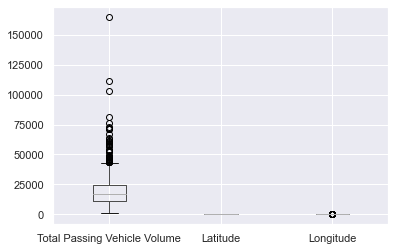

In [28]:
trafficDF.boxplot()

In the cell above we create a boxplot for each of the numeric columns in the traffic dataset and from these box plots it's clear to see that total passing vehicle volume has a lot of outliers that we need to deal with

Shape before removing outliers:  (1279, 8)
Shape after removing outliers:  (1239, 8)


<AxesSubplot:>

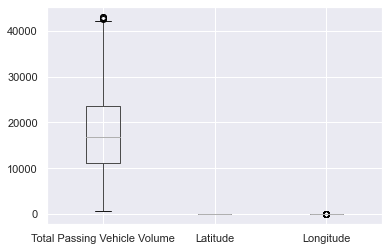

In [29]:
Q1=np.percentile(trafficDF["Total Passing Vehicle Volume"],25,interpolation='midpoint')
Q3=np.percentile(trafficDF["Total Passing Vehicle Volume"],75,interpolation='midpoint')
IQR=Q3-Q1
print("Shape before removing outliers: ",trafficDF.shape)

upperBound=np.where(trafficDF["Total Passing Vehicle Volume"]>=(Q3+1.5*IQR))
lowerBound=np.where(trafficDF["Total Passing Vehicle Volume"]<=(Q1-1.5*IQR))

trafficDF.drop(upperBound[0],inplace=True)
trafficDF.drop(lowerBound[0],inplace=True)

print("Shape after removing outliers: ",trafficDF.shape)
trafficDF.boxplot()

In the cell above we remove outliers from the traffic volume column in the traffic data set and print the old shape and the new shape as well as the new box plots as we can see 40 rows were dropped and the boxplot has much less outliers.

In [30]:
def retMonth(row):
    return int(row["Date of Count"][0:2])
trafficDF["Month"]=trafficDF.apply (lambda row: retMonth(row), axis=1)
trafficDF

,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location,Month
0,5838 West,Lake St,11/14/2006,7100,East Bound: 3600 / West Bound: 3500,41.887904,-87.771064,"(41.887904, -87.771064)",11
1,320 East,76th St,03/28/2006,8600,East Bound: 3800 / West Bound: 4800,41.756542,-87.617335,"(41.756542, -87.617335)",3
3,125 East,24th St,03/30/2006,700,East Bound: 400 / West Bound: 300,41.849302,-87.622658,"(41.849302, -87.622658)",3
4,2924 East,130th St,08/29/2006,4200,East Bound: 2300 / West Bound: 1900,41.659177,-87.552112,"(41.659177, -87.552112)",8
5,1931 West,Lake St,10/19/2006,6900,East Bound: 3400 / West Bound: 3500,41.885023,-87.675556,"(41.885023, -87.675556)",10
...,...,...,...,...,...,...,...,...,...
1274,256 East,35th St,03/29/2006,10200,East Bound: 4800 / West Bound: 5400,41.831081,-87.619334,"(41.831081, -87.619334)",3
1275,2032 North,Pulaski Rd,10/05/2006,21300,North Bound: 10800 / South Bound: 10500,41.918169,-87.726590,"(41.918169, -87.72659)",10
1276,6020 South,Halsted St,03/21/2006,13200,North Bound: 6900 / South Bound: 6300,41.784530,-87.644905,"(41.78453, -87.644905)",3
1277,3454 West,Franklin St,10/19/2006,5000,East Bound: 2200 / West Bound: 2800,41.890003,-87.713444,"(41.890003, -87.713444)",10


In the cell above we create a function that takes a row of the dataframe and returns the month found in the date of count column as an int as we believe that we may be able to do a linear regression taking month as a feature and total passing Vehicle Volume as the target to get a general idea of whether or not month has an impact on the volume of traffic and then from those results we can go into further analysis finding correlation and covariance of the month against the volume of traffic.

In [11]:
daysOfTheWeek=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
def retDayOfTheWeek(row):
    Month=row["Month"]
    day=int(row["Date of Count"][3:5])
    daysSinceTheFirst=0
    if Month==1:
        daysSinceTheFirst=day-1
    elif Month==2:
        daysSinceTheFirst=30+day
    elif Month==3:
        daysSinceTheFirst=30+28+day
    elif Month==4:
        daysSinceTheFirst=30+28+31+day
    elif Month==5:
        daysSinceTheFirst=30+28+31+30+day
    elif Month==6:
        daysSinceTheFirst=30+28+31+30+31+day
    elif Month==7:
        daysSinceTheFirst=30+28+31+30+31+30+day
    elif Month==8:
        daysSinceTheFirst=30+28+31+30+31+30+31+day
    elif Month==9:
        daysSinceTheFirst=30+28+31+30+31+30+31+31+day
    elif Month==10:
        daysSinceTheFirst=30+28+31+30+31+30+31+31+30+day
    elif Month==11:
        daysSinceTheFirst=30+28+31+30+31+30+31+31+30+31+day
    elif Month==12:
        daysSinceTheFirst=30+28+31+30+31+30+31+31+30+31+30+day
    return daysSinceTheFirst%7
trafficDF["Day of the week"]=trafficDF.apply (lambda row: retDayOfTheWeek(row), axis=1)
trafficDF

,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location,Month,Day of the week
0,5838 West,Lake St,11/14/2006,7100,East Bound: 3600 / West Bound: 3500,41.887904,-87.771064,"(41.887904, -87.771064)",11,2
1,320 East,76th St,03/28/2006,8600,East Bound: 3800 / West Bound: 4800,41.756542,-87.617335,"(41.756542, -87.617335)",3,2
2,1730 East,57th Dr,08/24/2006,53500,East Bound: 27800 / West Bound: 25700,41.792663,-87.582231,"(41.792663, -87.582231)",8,4
3,125 East,24th St,03/30/2006,700,East Bound: 400 / West Bound: 300,41.849302,-87.622658,"(41.849302, -87.622658)",3,4
4,2924 East,130th St,08/29/2006,4200,East Bound: 2300 / West Bound: 1900,41.659177,-87.552112,"(41.659177, -87.552112)",8,2
...,...,...,...,...,...,...,...,...,...,...
1274,256 East,35th St,03/29/2006,10200,East Bound: 4800 / West Bound: 5400,41.831081,-87.619334,"(41.831081, -87.619334)",3,3
1275,2032 North,Pulaski Rd,10/05/2006,21300,North Bound: 10800 / South Bound: 10500,41.918169,-87.726590,"(41.918169, -87.72659)",10,4
1276,6020 South,Halsted St,03/21/2006,13200,North Bound: 6900 / South Bound: 6300,41.784530,-87.644905,"(41.78453, -87.644905)",3,2
1277,3454 West,Franklin St,10/19/2006,5000,East Bound: 2200 / West Bound: 2800,41.890003,-87.713444,"(41.890003, -87.713444)",10,4


In the cell above we create a function that takes a row of the dataframe and returns the day of the week by taking the month in the day and the month found in the date of count column as an int with a value from 0-6, 0 being Sunday and 6 being Saturday, as we believe that we may be able to do a linear regression taking the day of the week as a feature and total passing Vehicle Volume as the target to get a general idea of whether or not the day of the week has an impact on the volume of traffic and then from those results we can go into further analysis finding correlation and covariance of the day of the week against the volume of traffic.

In [12]:
potholesDF.isnull().sum()

ADDRESS                                 0
REQUEST DATE                            0
COMPLETION DATE                         0
NUMBER OF POTHOLES FILLED ON BLOCK      0
LATITUDE                              414
LONGITUDE                             414
LOCATION                              414
dtype: int64

In the cell above we check if there are any null values in the potholesDF data frame

In [13]:
potholesDF=potholesDF.dropna()
potholesDF.isnull().sum()

ADDRESS                               0
REQUEST DATE                          0
COMPLETION DATE                       0
NUMBER OF POTHOLES FILLED ON BLOCK    0
LATITUDE                              0
LONGITUDE                             0
LOCATION                              0
dtype: int64

In the cell above we drop all rows that have a null value considering that we have a lot of rows these deletions should not affect our data

<AxesSubplot:>

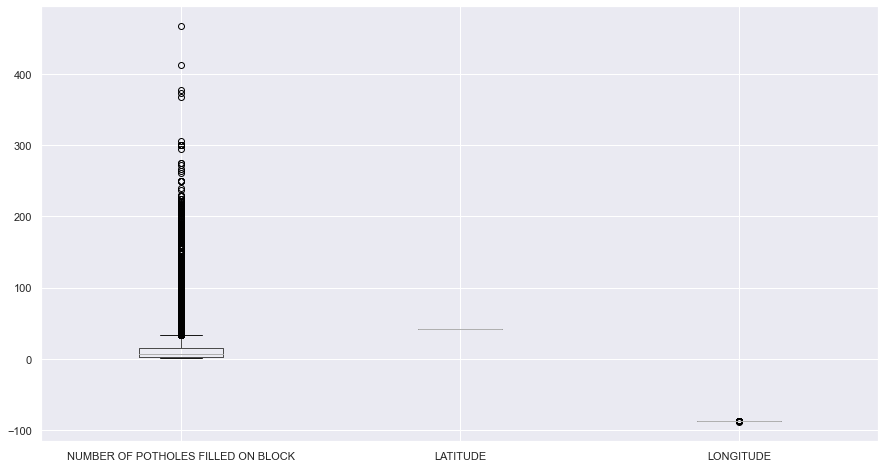

In [32]:
potholesDF.boxplot(figsize=(15,8))

In the cell above we print box plots of each numeric column in the pothole data set and we can clearly see that the number of potholes filled on block column has a lot of outliers that we need to deal with.

Shape before removing outliers:  (122344, 7)
Shape after removing outliers:  (112796, 7)


<AxesSubplot:>

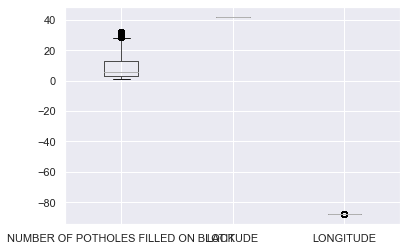

In [33]:
Q1=np.percentile(potholesDF["NUMBER OF POTHOLES FILLED ON BLOCK"],25,interpolation='midpoint')
Q3=np.percentile(potholesDF["NUMBER OF POTHOLES FILLED ON BLOCK"],75,interpolation='midpoint')
IQR=Q3-Q1
print("Shape before removing outliers: ",potholesDF.shape)

upperBound=np.where(potholesDF["NUMBER OF POTHOLES FILLED ON BLOCK"]>=(Q3+1.5*IQR))
lowerBound=np.where(potholesDF["NUMBER OF POTHOLES FILLED ON BLOCK"]<=(Q1-1.5*IQR))

potholesDF.drop(upperBound[0],inplace=True)
potholesDF.drop(lowerBound[0],inplace=True)

print("Shape after removing outliers: ",potholesDF.shape)
potholesDF.boxplot()

In the cell above we remove outliers from the potholes filled on block column in the potholes data set and print the old shape and the new shape as well as the new box plots as we can see around 10000 rows were dropped and the boxplot has much less outliers.

## Exploratory Data Analysis and Visualizations

In [14]:
trafficDF['Date of Count'] = pd.to_datetime(trafficDF['Date of Count'])

In the cell above we turn the objects in the Date of Count column of the traffic data set to datetime objects

In [34]:
potholesDF['COMPLETION DATE'] = pd.to_datetime(potholesDF['COMPLETION DATE'])

In the cell above we turn the objects in the completion date column of the potholes data set to datetime objects

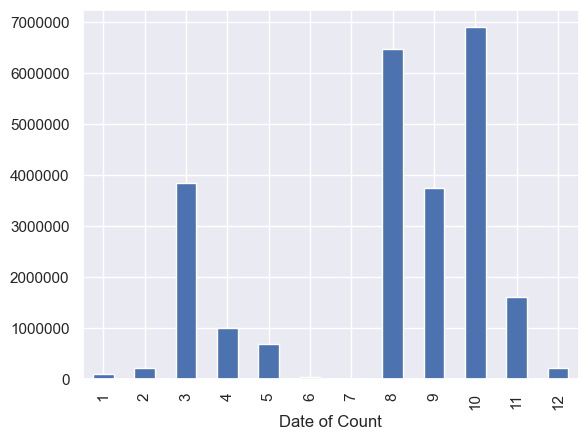

In [15]:
monthgroupby = trafficDF.groupby(trafficDF['Date of Count'].dt.month)['Total Passing Vehicle Volume'].sum()
from matplotlib import pyplot as plt
# df['date'].dt.month_name().str[:3]
monthgroupby.plot(kind='bar', x='Date of Count', y='Total Passing Vehicle Volume')
plt.gca().ticklabel_format(axis='y', style='plain')

In the cell above we group the traffic data set by month of count to get an idea of how much traffic there is each month and which months have the most traffic which we end up seeing is month 10 which is october.

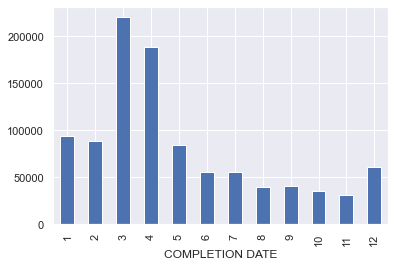

In [35]:
monthgroupby = potholesDF.groupby(potholesDF['COMPLETION DATE'].dt.month)['NUMBER OF POTHOLES FILLED ON BLOCK'].sum()
from matplotlib import pyplot as plt
# df['date'].dt.month_name().str[:3]
monthgroupby.plot(kind='bar', x='COMPLETION DATE', y='NUMBER OF POTHOLES FILLED ON BLOCK')
plt.gca().ticklabel_format(axis='y', style='plain')

In the cell above we group the potholes data set by month of completion date to get an idea of how many potholes where completed in each month and which months have the most potholes filled which we end up seeing is month 3 which is March.

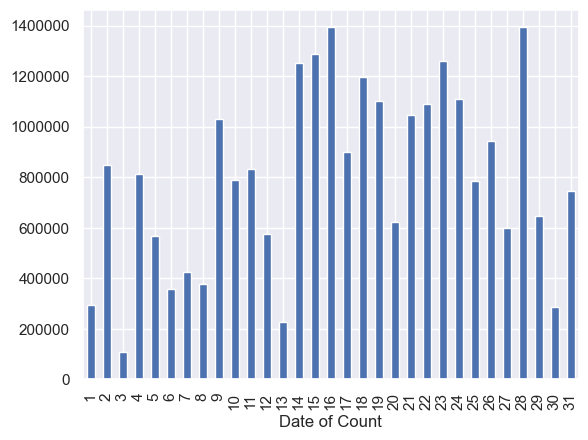

In [16]:
weeklygroupby = trafficDF.groupby(trafficDF['Date of Count'].dt.day)['Total Passing Vehicle Volume'].sum()
weeklygroupby.plot(kind='bar', x='Date of Count', y='Total Passing Vehicle Volume')
plt.gca().ticklabel_format(axis='y', style='plain')

In the cell above we group the traffic data set by day of count to get an idea of how much traffic there is each day from 1-31 in all months and which days have the most traffic which we end up seeing is day 28.

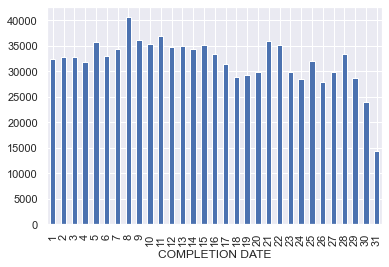

In [36]:
weeklygroupby = potholesDF.groupby(potholesDF['COMPLETION DATE'].dt.day)['NUMBER OF POTHOLES FILLED ON BLOCK'].sum()
weeklygroupby.plot(kind='bar', x='COMPLETION DATE', y='NUMBER OF POTHOLES FILLED ON BLOCK')
plt.gca().ticklabel_format(axis='y', style='plain')

In the cell above we group the potholes data set by day of completion to get an idea of how many potholes where filled each day from 1-31 in all months and which days have the most potholes being filled which we end up seeing is day 8.

In [17]:
trafficDF.index = trafficDF['Date of Count']
# del updatedTraffic['Date of Count']
trafficDF.head()


,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location,Month,Day of the week
Date of Count,,,,,,,,,,
2006-11-14,5838 West,Lake St,2006-11-14,7100,East Bound: 3600 / West Bound: 3500,41.887904,-87.771064,"(41.887904, -87.771064)",11,2
2006-03-28,320 East,76th St,2006-03-28,8600,East Bound: 3800 / West Bound: 4800,41.756542,-87.617335,"(41.756542, -87.617335)",3,2
2006-08-24,1730 East,57th Dr,2006-08-24,53500,East Bound: 27800 / West Bound: 25700,41.792663,-87.582231,"(41.792663, -87.582231)",8,4
2006-03-30,125 East,24th St,2006-03-30,700,East Bound: 400 / West Bound: 300,41.849302,-87.622658,"(41.849302, -87.622658)",3,4
2006-08-29,2924 East,130th St,2006-08-29,4200,East Bound: 2300 / West Bound: 1900,41.659177,-87.552112,"(41.659177, -87.552112)",8,2


## Scatter Plot

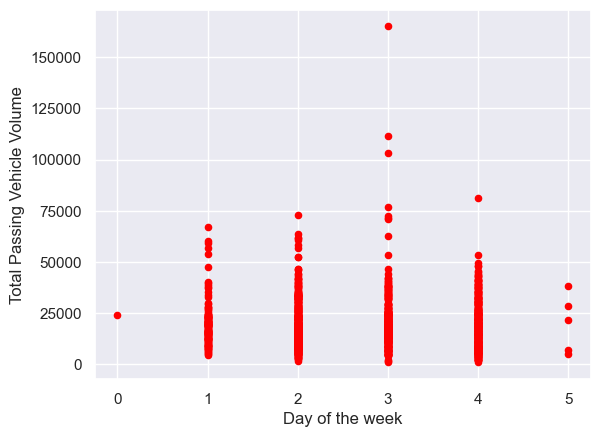

In [18]:
trafficDF.plot.scatter(x = 'Day of the week', y = 'Total Passing Vehicle Volume', c = 'red');

## Pie Chart

<AxesSubplot:ylabel='Total Passing Vehicle Volume'>

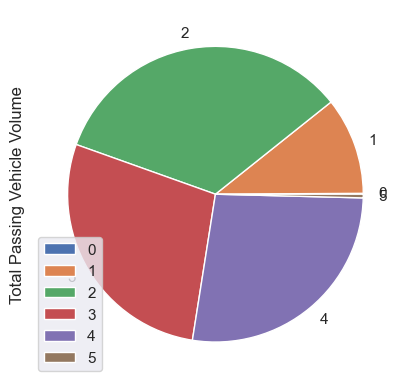

In [19]:
trafficDF.groupby(['Day of the week']).sum().plot(kind='pie', y=0)

## Linear Regression

In [20]:
trafficDF2=trafficDF[["Total Passing Vehicle Volume","Latitude","Longitude","Location"]]
trafficDF2

,Total Passing Vehicle Volume,Latitude,Longitude,Location
Date of Count,,,,
2006-11-14,7100,41.887904,-87.771064,"(41.887904, -87.771064)"
2006-03-28,8600,41.756542,-87.617335,"(41.756542, -87.617335)"
2006-08-24,53500,41.792663,-87.582231,"(41.792663, -87.582231)"
2006-03-30,700,41.849302,-87.622658,"(41.849302, -87.622658)"
2006-08-29,4200,41.659177,-87.552112,"(41.659177, -87.552112)"
...,...,...,...,...
2006-03-29,10200,41.831081,-87.619334,"(41.831081, -87.619334)"
2006-10-05,21300,41.918169,-87.726590,"(41.918169, -87.72659)"
2006-03-21,13200,41.784530,-87.644905,"(41.78453, -87.644905)"


In the above cell we split the original traffic data frame to a data frame that only consists of Volume, Latitude, Longitude, and Location. The goal is to do a linear regression using Longitude and Latitude as the features and Volume as the target. The reason we keep the Location column is because it is a combination of the latitude and longitude of a specific row into a string we can use this to check if there are any duplicate locations and if that is the case we need to get rid of the duplicates as this may effect the accuracy of the model. 

In [21]:
trafficDF2["Location"].value_counts()

(41.828474, -87.65091)     2
(41.876934, -87.666676)    2
(41.87346, -87.647091)     2
(41.887904, -87.771064)    1
(41.982087, -87.846432)    1
                          ..
(41.878472, -87.754997)    1
(41.96912, -87.652496)     1
(41.968422, -87.711419)    1
(41.749395, -87.724323)    1
(41.801796, -87.633948)    1
Name: Location, Length: 1276, dtype: int64

In the above cell we are checking the value counts of the location column to look for duplicates. As we can see there are only 3 Locations that have duplicates.


In [22]:
trafficDF2=trafficDF2[trafficDF2["Location"]!="(41.828474, -87.65091)"]
trafficDF2=trafficDF2[trafficDF2["Location"]!="(41.876934, -87.666676)"]
trafficDF2=trafficDF2[trafficDF2["Location"]!="(41.87346, -87.647091)"]
trafficDF2["Location"].value_counts()

(41.887904, -87.771064)    1
(41.982087, -87.846432)    1
(41.706174, -87.702769)    1
(41.731433, -87.575581)    1
(41.738684, -87.551457)    1
                          ..
(41.878472, -87.754997)    1
(41.96912, -87.652496)     1
(41.968422, -87.711419)    1
(41.749395, -87.724323)    1
(41.801796, -87.633948)    1
Name: Location, Length: 1273, dtype: int64

In the above cell we are removing the rows that for the locations that show up more than once in the data frame we are then checking the value counts of Location again to make sure there are no more duplicate locations

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=trafficDF2[["Longitude","Latitude"]]
Y=trafficDF2[["Total Passing Vehicle Volume"]]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
model=LinearRegression()
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print('Coefficient: \n',model.coef_)
print('Intercept : \n',model.intercept_)
print('R-squared: %.2f' % r2_score(Y_test, pred))
print('mean squared error for testing: %.2f'% mean_squared_error(Y_test, pred))

Coefficient: 
 [[-41459.70100833  -4150.30195101]]
Intercept : 
 [-3441853.59625311]
R-squared: 0.03
mean squared error for testing: 146257113.46


Now that we have removed all duplicates we are ready for linear regression and this is what we do in the cell above. We first split our X and Y X consisting of the data of the 2 features which are Latitude and Longitude and Y consisting of our target which is traffic volume. Afterwards we split the data to training and testing data. Then we fit the model and make predictions on the the test data and then we show the coefficient of the features of the model as well as the Intercept, the R-squared value and the MSE. We print this information to get an idea of how accurate the model is. We hoped for a hight R-squared score and a low MSE as this would mean that we could use this model to predict the volume of traffic in a location given its longitude and latitude. Unfortunately this was not the case as we had a very low R-squared score and a very high MSE, so this model is not accurate and can't be used for that purpose.

# Decision Tree Classifier

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [25]:
trafficDF

,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location,Month,Day of the week
Date of Count,,,,,,,,,,
2006-11-14,5838 West,Lake St,2006-11-14,7100,East Bound: 3600 / West Bound: 3500,41.887904,-87.771064,"(41.887904, -87.771064)",11,2
2006-03-28,320 East,76th St,2006-03-28,8600,East Bound: 3800 / West Bound: 4800,41.756542,-87.617335,"(41.756542, -87.617335)",3,2
2006-08-24,1730 East,57th Dr,2006-08-24,53500,East Bound: 27800 / West Bound: 25700,41.792663,-87.582231,"(41.792663, -87.582231)",8,4
2006-03-30,125 East,24th St,2006-03-30,700,East Bound: 400 / West Bound: 300,41.849302,-87.622658,"(41.849302, -87.622658)",3,4
2006-08-29,2924 East,130th St,2006-08-29,4200,East Bound: 2300 / West Bound: 1900,41.659177,-87.552112,"(41.659177, -87.552112)",8,2
...,...,...,...,...,...,...,...,...,...,...
2006-03-29,256 East,35th St,2006-03-29,10200,East Bound: 4800 / West Bound: 5400,41.831081,-87.619334,"(41.831081, -87.619334)",3,3
2006-10-05,2032 North,Pulaski Rd,2006-10-05,21300,North Bound: 10800 / South Bound: 10500,41.918169,-87.726590,"(41.918169, -87.72659)",10,4
2006-03-21,6020 South,Halsted St,2006-03-21,13200,North Bound: 6900 / South Bound: 6300,41.784530,-87.644905,"(41.78453, -87.644905)",3,2


In [26]:
trafficDF3 = trafficDF[["Date of Count", "Total Passing Vehicle Volume", "Month", "Day of the week"]]
trafficDF3

,Date of Count,Total Passing Vehicle Volume,Month,Day of the week
Date of Count,,,,
2006-11-14,2006-11-14,7100,11,2
2006-03-28,2006-03-28,8600,3,2
2006-08-24,2006-08-24,53500,8,4
2006-03-30,2006-03-30,700,3,4
2006-08-29,2006-08-29,4200,8,2
...,...,...,...,...
2006-03-29,2006-03-29,10200,3,3
2006-10-05,2006-10-05,21300,10,4
2006-03-21,2006-03-21,13200,3,2


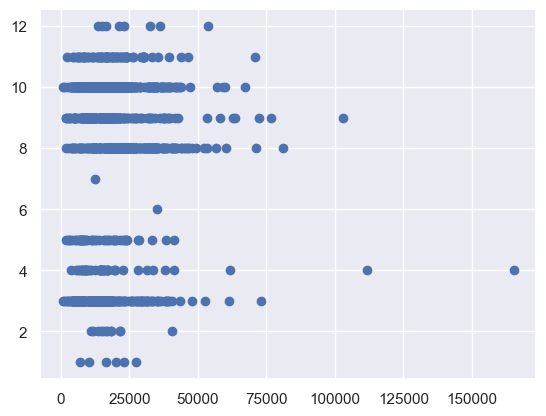

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.18      0.22      0.20        54
           4       0.20      0.20      0.20         5
           5       0.00      0.00      0.00        11
           8       0.19      0.20      0.19        50
           9       0.15      0.12      0.13        43
          10       0.31      0.33      0.32        69
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00         2

    accuracy                           0.20       256
   macro avg       0.10      0.11      0.10       256
weighted avg       0.19      0.20      0.19       256

[[ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0]
 [ 1  0 12  1  4 11  8 16  1  0]
 [ 0  0  0  1  1  3  0  0  0  0]
 [ 0  0  4  0  0  3  3  1  0  0]
 [ 0  2 13  0  1 10  7 16  1  0]
 [ 0  1 10  2  3  9  5 12  1  0]
 [ 1  4 18

C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# 2d classification dataset
Xs = trafficDF3[["Total Passing Vehicle Volume"]]
ys = trafficDF3[["Month"]]

# train-test split
Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xs, ys , test_size = 0.2, random_state = 0)

# plot the data
plt.scatter(Xs , ys)
plt.show()

clf4 = tree.DecisionTreeClassifier()

# Fit data
clf4.fit(Xs_train, ys_train)

# Predict
ys_predict = clf4.predict(Xs_test)

#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict))
print(metrics.confusion_matrix(ys_test, ys_predict))

For my ML analysis, I decided to do the Decision Tree classifier. 

The reason I did Decision Tree is because I wanted to see if I could cut off the possibilities as to which month would not have that many Total Passing Vehicle Volume. I would do this by examining the Total Passing Vehicle Volume as my feature. 

To do this, I created another dataset consisting of only "Total Passing Vehicle Volume", and "Month". I split my Xs and ys, with Xs consisting of "Total Passing Vehicle Volume" and ys consisting of "Month". I split the data to training and testing data. I than did a scatter plot for the data. 

My scatter plot shows that most Total Passing Vehicle Volume occurs in months March, April, May, August, September, October, November.

I than did the decision tree and displayed my outcome of classifications. 

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
For the precision I got i got low precisions meaning that we got a high false positive rate. We wanted a high precision which means a low fals positive rate. The ratio of correctly predicted positive observations is low meaning the ML algorithm wasn't able to correctly predict the observations.

Recall is the ratio of correctly predicted positive observations to the all observations in actual class
For the recall I got a low recall as all the months have below 0.5. This means that our ratio is low and the algorithm wasn't able to correctly predict positive observations.

F1 Score is the weighted average of Precision and Recall.
Since our Precision and Recall were low, our F1 score is also low.

Accuracy - Accuracy is the performance measure and it is simply a ratio of correctly predicted observation to the total observations. 
Our accuracy is 0.2 meaning it's 20% accurate

Overall this ML algorithm wasn't able to accurately predict the months with Total Passing Vehicle Volume as its feature. 

I wish I had better data to work with to make better use of the Decision Tree classifier but this dataset does not contain good features. If we had more time, we could have found perhaps a better dataset to work with that had better features to work with.

# K-means classification

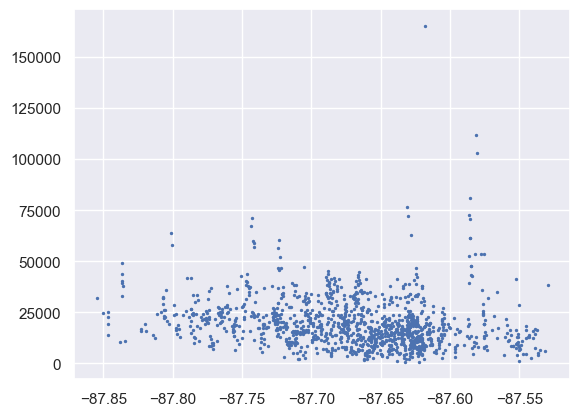

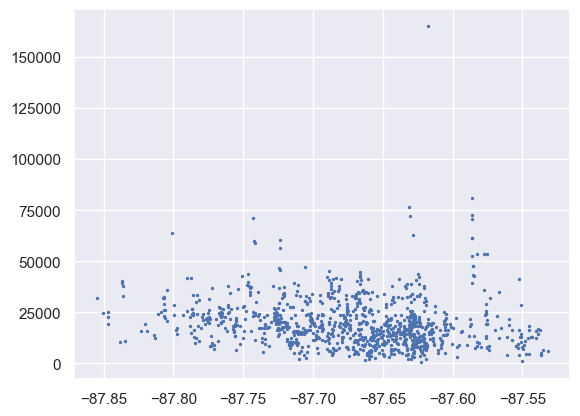

LABELS: 
[1 0 3 ... 0 2 0]


C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<AxesSubplot:xlabel='Longitude', ylabel='Total Passing Vehicle Volume'>

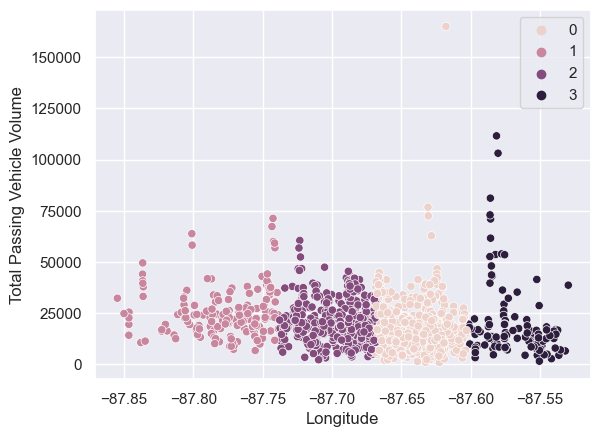

In [28]:
from sklearn.cluster import KMeans
import seaborn as sns

X = trafficDF2[["Longitude"]]
Y = trafficDF2[["Total Passing Vehicle Volume"]]

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
arr = Y[["Total Passing Vehicle Volume"]].to_numpy()
plt.scatter(X['Longitude'], Y['Total Passing Vehicle Volume'], s=2)
plt.show()

plt.scatter(Xs_train['Longitude'], ys_train, s=2)
plt.show()

km = KMeans(n_clusters=4, random_state=0)
fit = X['Longitude'].to_numpy()
fit = fit.reshape(-1, 1)

km.fit(fit)
labels = km.labels_
ypr = km.predict(X)
print("LABELS: ")
print(km.labels_)
sns.scatterplot(x=X['Longitude'], y=Y['Total Passing Vehicle Volume'], hue=km.labels_)


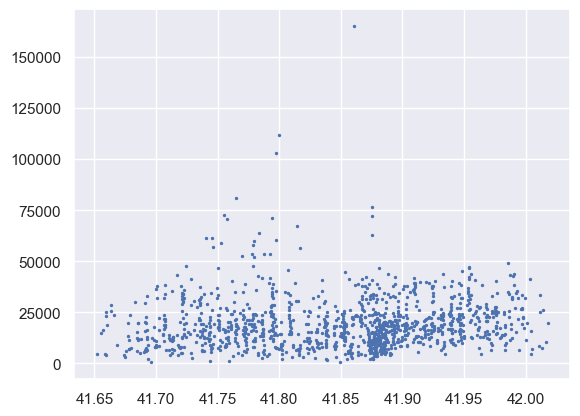

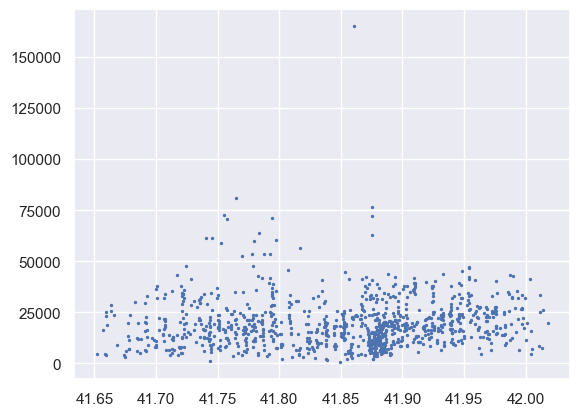

LABELS: 
[1 2 2 ... 2 1 2]


C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<AxesSubplot:xlabel='Latitude', ylabel='Total Passing Vehicle Volume'>

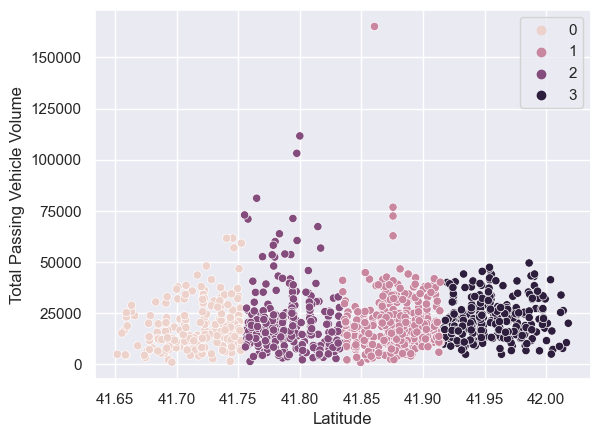

In [29]:
X = trafficDF2[["Latitude"]]
Y = trafficDF2[["Total Passing Vehicle Volume"]]

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
arr = Y[["Total Passing Vehicle Volume"]].to_numpy()
plt.scatter(X['Latitude'], Y['Total Passing Vehicle Volume'], s=2)
plt.show()

plt.scatter(Xs_train['Latitude'], ys_train, s=2)
plt.show()

km = KMeans(n_clusters=4, random_state=0)
fit = X['Latitude'].to_numpy()
fit = fit.reshape(-1, 1)

km.fit(fit)
labels = km.labels_
ypr = km.predict(X)
print("LABELS: ")
print(km.labels_)
sns.scatterplot(x=X['Latitude'], y=Y['Total Passing Vehicle Volume'], hue=km.labels_)

In the cells above, we add an additional machine learning algorithm through k-means clustering to partition traffic into four quadrants based on both the latitude and longitude coordinates in Chicago and vehicular volume recorded. Although our data wasn't perfect and we couldn't come up with direct solutions to our problems, we can still find valuable features and attributes related to potholes and traffic in Chicago. Splitting up traffic volume data into quadrants can give us information about differences in traffic in different parts and neighborhoods in the city, and can maybe even tell us where borders of traffic amount differences exist in the city. Looking at the clusters based on longitude, we can see that the most east (black ~ -87.55) doesn't have the most dense volume values, but we do see more volume observations of 75,000+, one reason for this could be that because Lake Shore Drive is close to these coordinates, there are many more opportunities of witnessing high vehicle counts. Looking at the latitude values, we see that the label 2, which clusters around 41.75 - 41.83 is dense and also has higher volume outliers, which also makes sense because this latitude coordinate range is in the heart of downtown Chicago, and also near highways.

# Time series analysis

In [30]:
trafficDF.index = trafficDF['Date of Count']
trafficDF = pd.DataFrame(trafficDF['Total Passing Vehicle Volume'])

# del updatedTraffic['Date of Count']
print(trafficDF.head())

               Total Passing Vehicle Volume
Date of Count                              
2006-11-14                             7100
2006-03-28                             8600
2006-08-24                            53500
2006-03-30                              700
2006-08-29                             4200


In the above cell I am making Date of Count as index

Text(0, 0.5, 'Total Passing Vehicle')

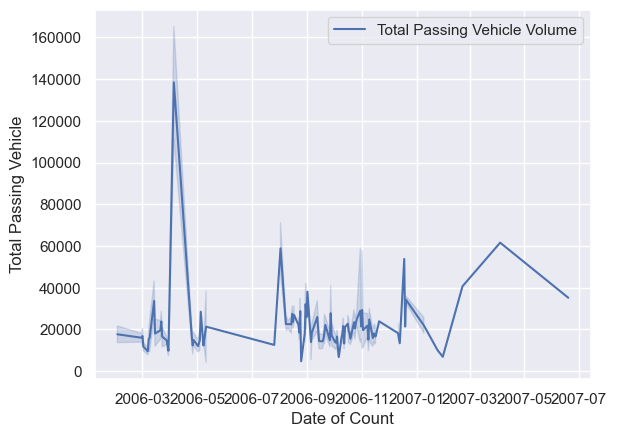

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.lineplot(trafficDF)
plt.ylabel("Total Passing Vehicle")

In the above cell I am trying to see pattern in total passing vehicle by plotting date of count as x-axis and total vehicle as y-axis.

In [32]:
type(trafficDF)
trafficDF.size
trafficDF.describe()

,Total Passing Vehicle Volume
count,1279.000000
mean,19466.301798
std,12448.378467
min,700.000000
25%,11350.000000
50%,17300.000000
75%,24200.000000
max,165200.000000


Above I am trying to see how our data looks.

In [33]:
trafficDF_mean = trafficDF.rolling(window = 20).mean()


I am calculating trafficDF_mean by using rolling as described in lectures. Then below I plot it.

<AxesSubplot:xlabel='Date of Count'>

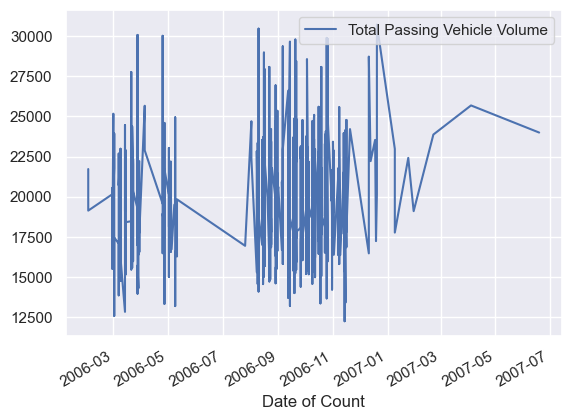

In [34]:
trafficDF_mean.plot() 

In [35]:
value = trafficDF.values
updatedValue = pd.DataFrame(value)

In [36]:
trafficDF_df = pd.concat([updatedValue, updatedValue.shift(1)], axis = 1)


In [37]:
trafficDF_df.head()

,0,0
0,7100,NaN
1,8600,7100.0
2,53500,8600.0
3,700,53500.0
4,4200,700.0


In [38]:
trafficDF_df.columns = ['Actual_Traffic_Volume', 'Predicted_Traffic_Volume']
trafficDF_df.head()

,Actual_Traffic_Volume,Predicted_Traffic_Volume
0,7100,NaN
1,8600,7100.0
2,53500,8600.0
3,700,53500.0
4,4200,700.0


In above cells i calculated shift values of 1 and then give column names of actual value and predicted value.

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [40]:
trafficDF_test = trafficDF_df[1:]
trafficDF_test.head()

,Actual_Traffic_Volume,Predicted_Traffic_Volume
1,8600,7100.0
2,53500,8600.0
3,700,53500.0
4,4200,700.0
5,6900,4200.0


Since first row had nan value Predicted_Traffic_Volume so i drop that

In [41]:
trafficDF_error = mean_squared_error(trafficDF_test.Actual_Traffic_Volume, trafficDF_test.Predicted_Traffic_Volume)

In [42]:
trafficDF_error

312467613.45852894

In [43]:
np.sqrt(trafficDF_error)

17676.753476205096

I calculated std for atual and predicted value and it makes sense based on our data values. It is not perfect though

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [45]:
trafficDF_df['Actual_Traffic_Volume'].size

1279

In [46]:
trafficDF_train = trafficDF_df['Actual_Traffic_Volume'][0:1024]
trafficDF_test = trafficDF_df['Actual_Traffic_Volume'][1024:1279]

Manually divide test and trainign data, test data has 20 percent of rows.

In [47]:
from statsmodels.tsa.arima.model import ARIMA

In [48]:
trafficDF_model = ARIMA(trafficDF_train, order=(2,0,3))

In [49]:
trafficDF_model_fit = trafficDF_model.fit()

In [50]:
trafficDF_model_fit.aic


22246.254250975857

In [51]:
trafficDF_prediction = trafficDF_model_fit.forecast(steps=255)
trafficDF_prediction


1024    19850.549598
1025    20345.683584
1026    19137.297802
1027    18372.950149
1028    19343.738242
            ...     
1274    19358.530497
1275    19360.503710
1276    19360.939459
1277    19359.167396
1278    19358.346399
Name: predicted_mean, Length: 255, dtype: float64

In [52]:
trafficDF_test

1024    18700
1025    22100
1026    10500
1027    20200
1028    34100
        ...  
1274    10200
1275    21300
1276    13200
1277     5000
1278    14400
Name: Actual_Traffic_Volume, Length: 255, dtype: int64

In [53]:
result = pd.concat([trafficDF_test, trafficDF_prediction], axis=1, join='inner')
result

,Actual_Traffic_Volume,predicted_mean
1024,18700,19850.549598
1025,22100,20345.683584
1026,10500,19137.297802
1027,20200,18372.950149
1028,34100,19343.738242
...,...,...
1274,10200,19358.530497
1275,21300,19360.503710
1276,13200,19360.939459
1277,5000,19359.167396


In [54]:
np.sqrt(mean_squared_error(trafficDF_test, trafficDF_prediction))

11996.891623905076

Above I am using arima to build my time series analysis model, we can see predicted_mean is lot differ than actual_traffic_volume.

<AxesSubplot:>

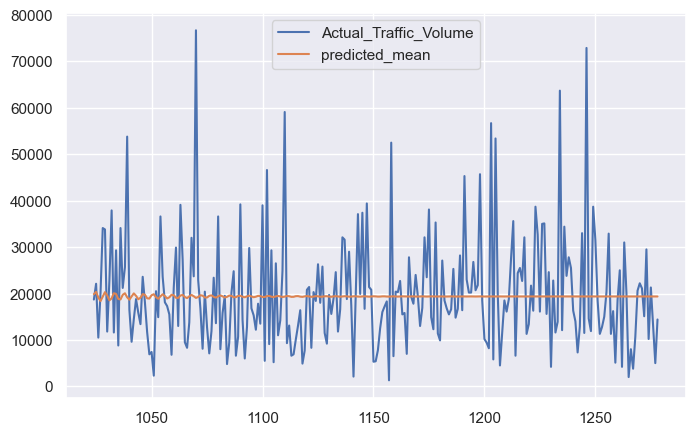

In [55]:
# updatedTraffic_prediction.plot()
# updatedTraffic_test.plot()
result[['Actual_Traffic_Volume', 'predicted_mean']].plot(figsize=(8, 5))


Above plot we can see arima is not good to model our data for time series sicne we have seasonal pattern and in above plot orange line is not seasonal.

In [56]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(result['Actual_Traffic_Volume'], order = (2,1,2), seasonal_order = (2,1,2,30))
sar_result = model.fit()

C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<AxesSubplot:>

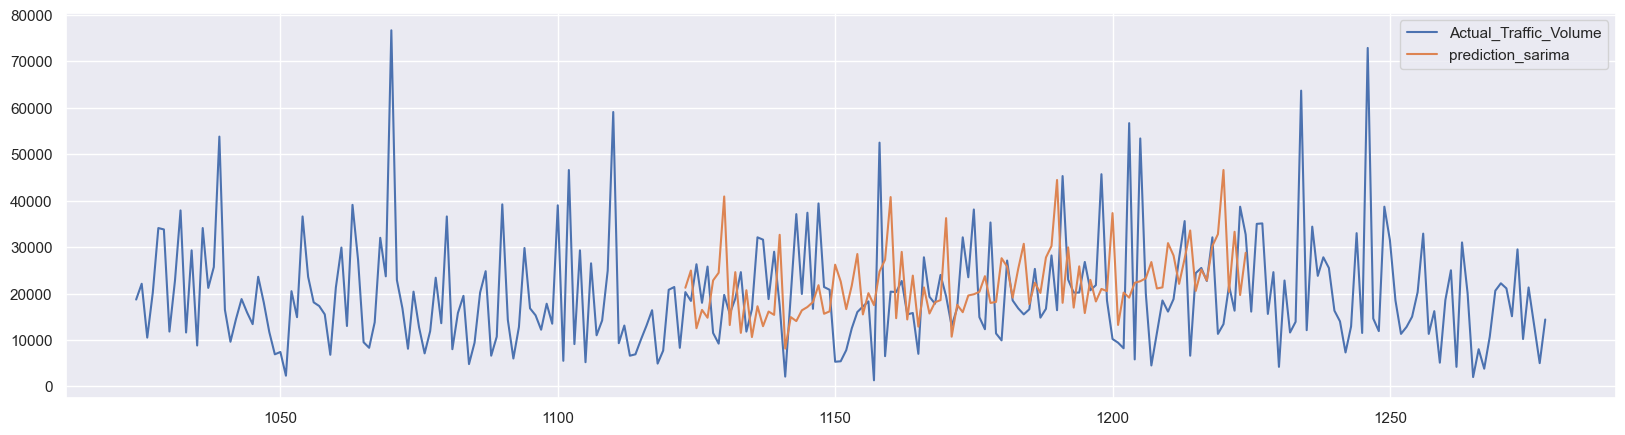

In [57]:
result['prediction_sarima'] = sar_result.predict(start=99, end=200, dynamic=True)
result[['Actual_Traffic_Volume', 'prediction_sarima']].plot(figsize=(20,5))

In above cells i used sarima model now it looks pretty close to actual data.

In [58]:
import datetime
from dateutil.relativedelta import relativedelta

start = 1279

index_list = [1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300]

future_prediction = pd.DataFrame(index=index_list, columns= result.columns)

future_prediction

result = pd.concat([result, future_prediction])
result


,Actual_Traffic_Volume,predicted_mean,prediction_sarima
1024,18700,19850.549598,NaN
1025,22100,20345.683584,NaN
1026,10500,19137.297802,NaN
1027,20200,18372.950149,NaN
1028,34100,19343.738242,NaN
...,...,...,...
1296,NaN,NaN,NaN
1297,NaN,NaN,NaN
1298,NaN,NaN,NaN
1299,NaN,NaN,NaN


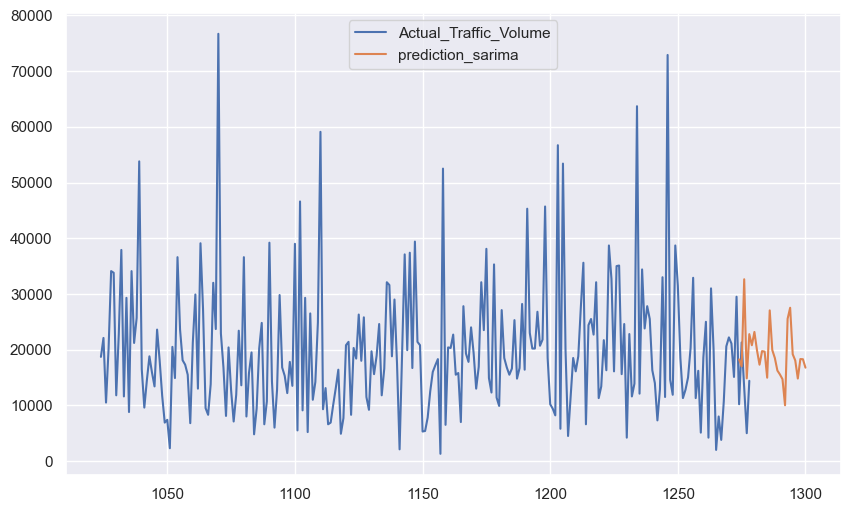

In [59]:
result['prediction_sarima'] = sar_result.predict(start=250, end=300, dynamic=True)
result[['Actual_Traffic_Volume','prediction_sarima']].plot(figsize=(10, 6))
plt.grid(True)

Above I created few future data and find their traffic value using our sarima model and then plot it above as we can see it is pretty seasonal and closely match to actual data much better than arima model.

## Reflection

The hardest part of the project that we’ve encountered is that our data could be better. It's not recent enough for it to give us accurate results.

Our final insights is that we need to acquire more recent and accurate data from a source to be able to get better results and to be able to group the datasets together.

At the moment, we can't show concrete results until we improve the data so we have better features.

Going forward our biggest problems will be calculating more ML analysis and acquiring better data. 


## Next steps

Aquire better and more accurate data. See if this data generates better features. Come up with more ML analysis. 